# Example of training procedure using Trainer class

In [1]:
from trainer import Trainer
from unet import UNet
from dataset import SegmentationDataset

In [2]:
# Define the configuration parameters

from config import *

In [3]:
# Create the model

model = UNet(in_channels=IN_CHANNELS, out_channels=OUT_CHANNELS, features=FEATURES)

In [4]:
# Define the transforms

import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader

train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),    # 50% chance of flipping the image
    A.Rotate(5),                # rotate +/- 5 degrees
    A.RandomResizedCrop(width=IMAGE_WIDTH, 
                        height=IMAGE_HEIGHT, 
                        scale=(CROP_MIN_AREA, CROP_MAX_AREA)),  # crop the image
    ToTensorV2()
])

val_transform = A.Compose([
    A.CenterCrop(IMAGE_HEIGHT*8, IMAGE_WIDTH*8),
    A.Resize(IMAGE_HEIGHT, IMAGE_WIDTH),
    # A.RandomCrop(IMAGE_HEIGHT, IMAGE_WIDTH),
    ToTensorV2()
])

In [5]:
# Create the datasets and dataloaders

train_dataset = SegmentationDataset(TRAIN_IMG_DIR, TRAIN_MASK_DIR, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY, shuffle=True)

val_dataset = SegmentationDataset(VAL_IMG_DIR, VAL_MASK_DIR, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY, shuffle=False)

In [ ]:
# Initialize a trainer object and train the model

trainer = Trainer(model, train_loader, val_loader)
train_loss, val_loss, val_accuracy, val_dice = trainer.train(num_epochs=NUM_EPOCHS, 
                                                             save_interval=SAVE_INTERVAL, 
                                                             save_val_img=SAVE_VAL_IMG, 
                                                             save_train_img=SAVE_TRAIN_IMG)


Epoch [0/1]


Training: 100%|██████████| 9/9 [01:25<00:00,  9.47s/it, loss=-1.1]   


Training Loss: -0.1966


Validation: 100%|██████████| 4/4 [00:21<00:00,  5.36s/it, loss=0.623]


Validation Loss: 0.6214  -  Accuracy: 0.6718  -  Dice Score: 1.1918

Epoch [1/1]


Training: 100%|██████████| 9/9 [01:09<00:00,  7.70s/it, loss=-3.04] 


Training Loss: -2.0491


Validation: 100%|██████████| 4/4 [00:23<00:00,  5.89s/it, loss=0.614]

Validation Loss: 0.5848  -  Accuracy: 0.8065  -  Dice Score: 0.8332


In [ ]:
# Save the lists of losses, accuracy and dice scores

import numpy as np
np.save(TRAIN_LOSS_PATH, np.array(train_loss))
np.save(VAL_LOSS_PATH, np.array(val_loss))
np.save(VAL_ACC_PATH, np.array(val_accuracy))
np.save(VAL_DICE_PATH, np.array(val_dice))

# To load the saved lists, use:
# train_loss = np.load("train_loss.npy") 

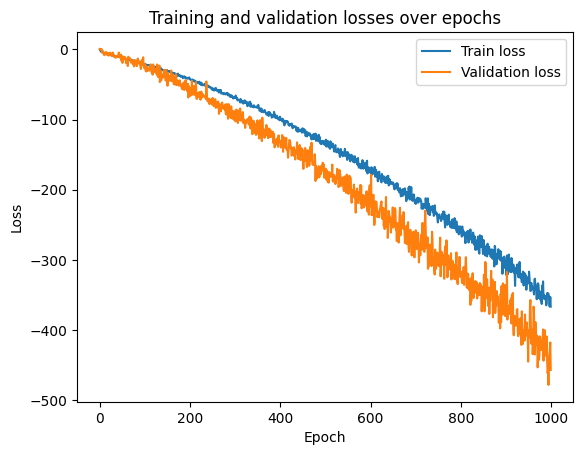

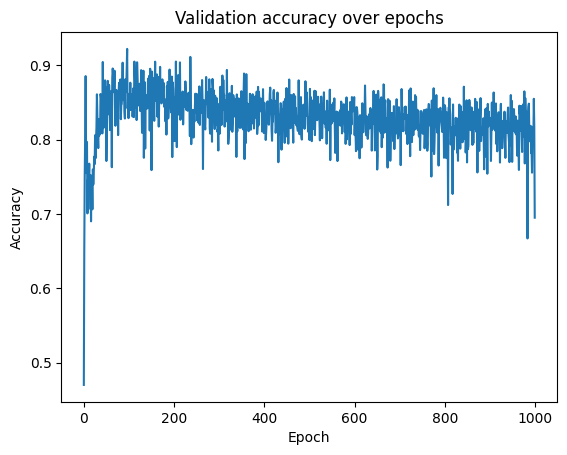

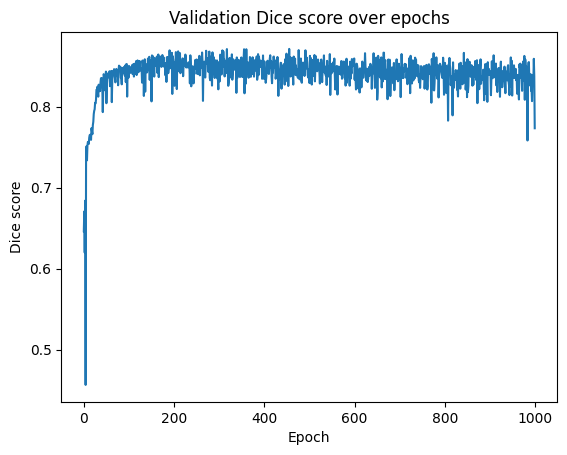

In [10]:
# Plot the results

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure()
plt.title("Training and validation losses over epochs")
plt.plot(train_loss, label="Train loss")
plt.plot(val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig(LOSS_PLOT_PATH)
plt.show()

# Plot the validation accuracy
plt.figure()
plt.title("Validation accuracy over epochs")
plt.plot(val_accuracy, label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig(ACC_PLOT_PATH)
plt.show()

# Plot the validation dice
plt.figure()
plt.title("Validation Dice score over epochs")
plt.plot(val_dice, label="validation dice")
plt.xlabel("Epoch")
plt.ylabel("Dice score")
plt.savefig(DICE_PLOT_PATH)
plt.show()